**Objective**:
Predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru based on environmental variables describing changes in temperature, precipitation, vegetation, and more.
An understanding of the relationship between climate and dengue dynamics can improve research initiatives and resource allocation to help fight life-threatening pandemics.

## Abbreviations:

  **City and date indicators:**

    city — City abbreviations: sj for San Juan and iq for Iquitos\
    week_start_date — Date given in yyyy-mm-dd format

**NOAA’s GHCN daily climate data weather station measurements**:

    station_max_temp_c — Maximum temperature\
    station_min_temp_c — Minimum temperature\
    station_avg_temp_c — Average temperature\
    station_precip_mm — Total precipitation\
    station_diur_temp_rng_c — Diurnal temperature range

**PERSIANN satellite precipitation measurements (0.25x0.25 degree scale):**

  precipitation_amt_mm — Total precipitation

**NOAA’s NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale):**

    reanalysis_sat_precip_amt_mm — Total precipitation\
    reanalysis_dew_point_temp_k — Mean dew point temperature\
    reanalysis_air_temp_k — Mean air temperature\
    reanalysis_relative_humidity_percent — Mean relative humidity\
    reanalysis_specific_humidity_g_per_kg — Mean specific humidity\
    reanalysis_precip_amt_kg_per_m2 — Total precipitation\
    reanalysis_max_air_temp_k — Maximum air temperature\
    reanalysis_min_air_temp_k — Minimum air temperature\
    reanalysis_avg_temp_k — Average air temperature\
    reanalysis_tdtr_k — Diurnal temperature range

**Satellite vegetation — Normalized difference vegetation index (NDVI) — NOAA’s CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements:**

    ndvi_se — Pixel southeast of city centroid\
    ndvi_sw — Pixel southwest of city centroid\
    ndvi_ne — Pixel northeast of city centroid\
    ndvi_nw — Pixel northwest of city centroid

Exploratory anallysis

In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('max_seq_item', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option("display.precision", 2)



## Load datasets, exploratory analysis:

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/dmy-collab/Const/main/dengue_features_train.csv')
labels = pd.read_csv('https://raw.githubusercontent.com/dmy-collab/Const/main/dengue_labels_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dmy-collab/Const/main/dengue_features_test.csv')
sample = pd.read_csv('https://raw.githubusercontent.com/dmy-collab/Const/main/submission_format.csv')

In [4]:
train.describe()  # Training set

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.00,1456.00,1262.00,1404.00,1434.00,1434.00,1443.00,1446.00,1446.00,1446.00,1446.00,1446.00,1446.00,1446.00,1443.00,1446.00,1446.00,1413.00,1413.00,1436.00,1442.00,1434.00
mean,2001.03,26.50,0.14,0.13,0.20,0.20,45.76,298.70,299.23,295.25,303.43,295.72,40.15,82.16,45.76,16.75,4.90,27.19,8.06,32.45,22.10,39.33
std,5.41,15.02,0.14,0.12,0.07,0.08,43.72,1.36,1.26,1.53,3.23,2.57,43.43,7.15,43.72,1.54,3.55,1.29,2.13,1.96,1.57,47.46
min,1990.00,1.00,-0.41,-0.46,-0.02,-0.06,0.00,294.64,294.89,289.64,297.80,286.90,0.00,57.79,0.00,11.72,1.36,21.40,4.53,26.70,14.70,0.00
25%,1997.00,13.75,0.04,0.05,0.16,0.14,9.80,297.66,298.26,294.12,301.00,293.90,13.05,77.18,9.80,15.56,2.33,26.30,6.51,31.10,21.10,8.70
50%,2002.00,26.50,0.13,0.12,0.20,0.19,38.34,298.65,299.29,295.64,302.40,296.20,27.24,80.30,38.34,17.09,2.86,27.41,7.30,32.80,22.20,23.85
75%,2005.00,39.25,0.25,0.22,0.25,0.25,70.23,299.83,300.21,296.46,305.50,297.90,52.20,86.36,70.23,17.98,7.62,28.16,9.57,33.90,23.30,53.90
max,2010.00,53.00,0.51,0.45,0.54,0.55,390.60,302.20,302.93,298.45,314.00,299.90,570.50,98.61,390.60,20.46,16.03,30.80,15.80,42.20,25.60,543.30


In [5]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12,0.10,0.20,0.18,12.42,297.57,297.74,292.41,299.8,295.9,32.00,73.37,12.42,14.01,2.63,25.44,6.90,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.17,0.14,0.16,0.16,22.82,298.21,298.44,293.95,300.9,296.4,17.94,77.37,22.82,15.37,2.37,26.71,6.37,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03,0.17,0.16,0.17,34.54,298.78,298.88,295.43,300.5,297.3,26.10,82.05,34.54,16.85,2.30,26.71,6.49,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.13,0.25,0.23,0.24,15.36,298.99,299.23,295.31,301.4,297.0,13.90,80.34,15.36,16.67,2.43,27.47,6.77,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.20,0.26,0.25,0.25,7.52,299.52,299.66,295.82,301.9,297.5,12.20,80.46,7.52,17.21,3.01,28.94,9.37,35.0,23.9,5.8


In [6]:
test.head() # Test set

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-1.89e-02,-0.02,0.10,0.09,78.60,298.49,298.55,294.53,301.1,296.4,25.37,78.78,78.60,15.92,3.13,26.53,7.06,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-1.80e-02,-0.01,0.08,0.07,12.56,298.48,298.56,294.40,300.8,296.7,21.83,78.23,12.56,15.79,2.57,26.07,5.56,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-1.50e-03,NaN,0.15,0.09,3.66,299.46,299.36,295.31,302.2,296.4,4.12,78.27,3.66,16.67,4.43,27.93,7.79,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.02,0.12,0.13,0.00,299.69,299.73,294.40,303.0,296.9,2.20,73.02,0.00,15.78,4.34,28.06,6.27,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,5.68e-02,0.04,0.06,0.08,0.76,299.78,299.67,294.76,302.3,297.3,4.36,74.08,0.76,16.14,3.54,27.61,7.09,33.3,23.3,84.1


In [7]:
labels.head() # Labels (cases of infection)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


## Let's merge labels with training dataset:

In [8]:
train = train.merge(labels, on=['city', 'year', 'weekofyear'], how='left')
train[:20]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.12,0.10,0.20,0.18,12.42,297.57,297.74,292.41,299.8,295.9,32.00,73.37,12.42,14.01,2.63,25.44,6.90,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.17,0.14,0.16,0.16,22.82,298.21,298.44,293.95,300.9,296.4,17.94,77.37,22.82,15.37,2.37,26.71,6.37,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.03,0.17,0.16,0.17,34.54,298.78,298.88,295.43,300.5,297.3,26.10,82.05,34.54,16.85,2.30,26.71,6.49,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.13,0.25,0.23,0.24,15.36,298.99,299.23,295.31,301.4,297.0,13.90,80.34,15.36,16.67,2.43,27.47,6.77,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.20,0.26,0.25,0.25,7.52,299.52,299.66,295.82,301.9,297.5,12.20,80.46,7.52,17.21,3.01,28.94,9.37,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.17,0.25,0.18,9.58,299.63,299.76,295.85,302.4,298.1,26.49,79.89,9.58,17.21,2.10,28.11,6.94,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.11,0.09,0.21,0.21,3.48,299.21,299.22,295.87,301.3,297.7,38.60,82.00,3.48,17.23,2.04,27.41,6.77,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.07,0.07,0.15,0.13,151.12,299.59,299.53,296.53,300.6,298.4,30.00,83.38,151.12,17.98,1.57,28.37,7.69,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.10,0.15,0.13,0.12,19.32,299.58,299.56,296.38,302.1,297.7,37.51,82.77,19.32,17.79,1.89,28.33,7.39,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.12,0.16,0.20,14.41,300.15,300.28,296.65,302.3,298.7,28.40,81.28,14.41,18.07,2.01,28.33,6.51,33.9,24.4,1.1,6


### Number of cases per city:

In [9]:
case_per_city = train.groupby(['city', 'week_start_date'])['total_cases'].sum().reset_index()
case_per_city


,city,week_start_date,total_cases
0,iq,2000-07-01,0
1,iq,2000-07-08,0
2,iq,2000-07-15,0
3,iq,2000-07-22,0
4,iq,2000-07-29,0
5,iq,2000-08-05,0
6,iq,2000-08-12,0
7,iq,2000-08-19,0
8,iq,2000-08-26,0
9,iq,2000-09-02,0


## Now we should check for missing data:

In [10]:
train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [11]:
test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

## There is a signigicant number of missing values in some columns of training and test sets.
Let's review dataset information  for now:

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

### Columns 'city' and 'week_start_date' must be converted to numerical data type to avoid training conflicts.

In [13]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.city = enc.fit_transform(train.city.values.reshape(-1,1))
train.week_start_date = enc.fit_transform(train.week_start_date.values.reshape(-1,1))

test.city = enc.fit_transform(test.city.values.reshape(-1,1))
test.week_start_date = enc.fit_transform(test.week_start_date.values.reshape(-1,1))

Now sj (San Juan) will be encoded as 1, and iq (Iquitos) as 0

In [14]:
train[0:20]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1.0,1990,18,0.0,0.12,0.10,0.20,0.18,12.42,297.57,297.74,292.41,299.8,295.9,32.00,73.37,12.42,14.01,2.63,25.44,6.90,29.4,20.0,16.0,4
1,1.0,1990,19,1.0,0.17,0.14,0.16,0.16,22.82,298.21,298.44,293.95,300.9,296.4,17.94,77.37,22.82,15.37,2.37,26.71,6.37,31.7,22.2,8.6,5
2,1.0,1990,20,2.0,0.03,0.17,0.16,0.17,34.54,298.78,298.88,295.43,300.5,297.3,26.10,82.05,34.54,16.85,2.30,26.71,6.49,32.2,22.8,41.4,4
3,1.0,1990,21,3.0,0.13,0.25,0.23,0.24,15.36,298.99,299.23,295.31,301.4,297.0,13.90,80.34,15.36,16.67,2.43,27.47,6.77,33.3,23.3,4.0,3
4,1.0,1990,22,4.0,0.20,0.26,0.25,0.25,7.52,299.52,299.66,295.82,301.9,297.5,12.20,80.46,7.52,17.21,3.01,28.94,9.37,35.0,23.9,5.8,6
5,1.0,1990,23,5.0,NaN,0.17,0.25,0.18,9.58,299.63,299.76,295.85,302.4,298.1,26.49,79.89,9.58,17.21,2.10,28.11,6.94,34.4,23.9,39.1,2
6,1.0,1990,24,6.0,0.11,0.09,0.21,0.21,3.48,299.21,299.22,295.87,301.3,297.7,38.60,82.00,3.48,17.23,2.04,27.41,6.77,32.2,23.3,29.7,4
7,1.0,1990,25,7.0,0.07,0.07,0.15,0.13,151.12,299.59,299.53,296.53,300.6,298.4,30.00,83.38,151.12,17.98,1.57,28.37,7.69,33.9,22.8,21.1,5
8,1.0,1990,26,8.0,0.10,0.15,0.13,0.12,19.32,299.58,299.56,296.38,302.1,297.7,37.51,82.77,19.32,17.79,1.89,28.33,7.39,33.9,22.8,21.1,10
9,1.0,1990,27,9.0,NaN,0.12,0.16,0.20,14.41,300.15,300.28,296.65,302.3,298.7,28.40,81.28,14.41,18.07,2.01,28.33,6.51,33.9,24.4,1.1,6


_________________________________________

## Some walues are missing. Since our dataset is rather small, let's perform the missing value imputation. For that we will use experimental iterative imputer*.
*(which models each feature with missing values as a function of other features, and uses that estimate for imputation this process is repeated multiple times. The repetition allows the refined estimated values for other features to be used as input in subsequent iterations of predicting missing values).

Let's swap missing values for numpy.nan, since it's required for the iterative imputation method. It is useful for dealing with noisy data like ours.

In [15]:
for c in train.columns:
    train[c] = pd.to_numeric(train[c], errors='coerce')

for c in test.columns:
    test[c] = pd.to_numeric(test[c], errors='coerce')

### Now we can visualize the nuber of cases per city:

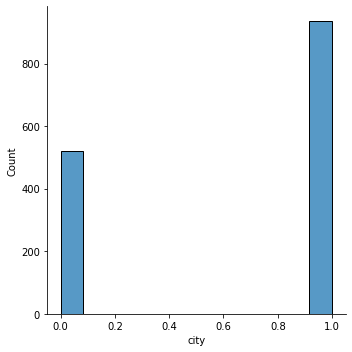

In [16]:
sns.displot(train['city'])

San Juan (encoded as 1) has a greater number than Iquitos (encoded as 0)

### Distribution of registered cases:

In [17]:
from collections import Counter

print(Counter(train.city))

Counter({1.0: 936, 0.0: 520})


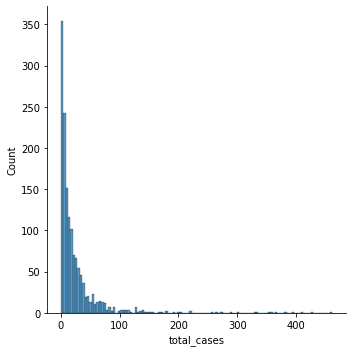

In [18]:
sns.displot(train['total_cases'])

We can see that most of the time the number of cases was within 0-100 range.

Some of the columns deliver essentially the same information from our objective perspective, thus they can be removed from our datasetets when defining parameters X, y and X_test:

In [19]:
y = train.total_cases.values
X = train.drop(['week_start_date', 'total_cases'], axis = 1).values
X_test = test.drop(['week_start_date'], axis = 1).values

Now let's split dataset for training and validation:

In [20]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1, shuffle = True)
X_train.shape, X_val.shape, y_train.shape,y_val.shape, X_test.shape

((1310, 23), (146, 23), (1310,), (146,), (416, 23))

### Finally, we are ready to perform the imputation. To reduce posibility of overfitting, we want our model to learn and replace nan values on our training set (apply fit_transform function) while avoiding leakage of information into our validation and training sets (use transform function without the fit).

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=1)

X_train = imp.fit_transform(X_train)
X_val = imp.transform(X_val)
X_test = imp.transform(X_test)

### The next logical step would be scaling the data to reduce bias towards features of a larger scale and improve the convergence process.

In [22]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the validation set
X_val = scaler.transform(X_val)
# Scale the test set
X_test = scaler.transform(X_test)

In [23]:
X_val.shape, X_train.shape, X_test.shape

((146, 23), (1310, 23), (416, 23))

### We are ready for the modeling process.

Considering dataset size and the number of missing values in the original dataset, it would be appropriate to use gradient bost technique (GradientBoostingRegressor) in place of stupms in AdaBoostRegressor as base-learners, which should improve performance compared to the classification by one tree or other single base-learner*. The idea of Boosting method is that instead of using a simple algorithm, which is not strong enough to make the accurate predictions alone as there are high variance and error rate, we combine multiple simple learning algorithms together, rather than finding a single highly accurate prediction rule.

###### * *Both the algorithms work for boosting the performance of a simple base-learner by iteratively shifting the focus towards problematic observations that are challenging to predict. In the case of AdaBoost, the shifting is done by up-weighting observations that were misclassified before, while Gradient Boosting identifies the difficult observations by large residuals computed in the previous iterations.*

#### Let's define our model parameters and train it on the train dataset:

To make our life a little simpler, let's use experimental HalvingGridSearchCV to select our model hyperparameters.

In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = AdaBoostRegressor(base_estimator=GradientBoostingRegressor(loss='squared_error', learning_rate=.1, random_state=1))

In [ ]:
  from sklearn.experimental import enable_halving_search_cv
  from sklearn.model_selection import HalvingGridSearchCV
  param_grid = {'base_estimator__max_depth': [5, 6, 7, 8],'base_estimator__min_samples_split': [2, 20, 100, 200, 500, 1000], 'base_estimator__n_estimators': [100, 200, 400, 500, 1000]}
  sh = HalvingGridSearchCV(model, param_grid, cv=5, factor=2).fit(X_train, y_train)
  sh.best_estimator_

After getting the optimized parameters, they could be used for training the model. This process will take a while within Jupyter notebook, so here is the output of the Halving Grid Search:\
base_estimator__max_depth = 5\
base_estimator__min_samples_split = 20\
base_estimator__n_estimators = 500


Now, we can use these parameters to train the model on the training set:

In [31]:
model = AdaBoostRegressor(base_estimator=GradientBoostingRegressor(max_depth=5, min_samples_split=20, loss='squared_error',n_estimators=500, learning_rate=.1, random_state=1))
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9976648895290713


With this method we achieved 99% acuracy on the training set.

__________________________________________________________________________

#### With the trained model we can make a prediction and evaluate the result.

##### First, on validation subset of the training dataset.

In [32]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.7586673223677493
0.9995139190436929


(None, None)

We achieved 76% accuracy on the validation dataset.

Let't take a look at predictions vs actual values in the validation subset:

In [33]:
val_predict_actual = pd.DataFrame({'Val_Actual': y_val, 'Val_Predicted':y_pred})
val_predict_actual[:20]

,Val_Actual,Val_Predicted
0,0,20
1,26,33
2,2,19
3,3,3
4,7,10
5,26,38
6,6,7
7,0,1
8,10,15
9,2,7


##### Finaly, we can make a prediction with our model given the inputs from the test dataset.

In [34]:
test_predict = model.predict(X_test)
test_predict = test_predict.astype(int)

"test_predict = pd.DataFrame({'Test_redicted':y_pred})\ntest_predict[:20]"

In [35]:
test_predict = pd.DataFrame({'city': test.city, 'year': test.year, 'weekofyear': test.weekofyear,'total_cases': test_predict})


The final prediction can be saved as CSV file.

In [37]:
test_predict.to_csv('test_predict.csv', index=False)

After submitting the result, I received a score of 26.2909.

A

For a reference, here is the list of the environment and packages used for this notebook.

matplotlib          3.2.2\
numpy               1.21.6\
pandas              1.3.5\
seaborn             0.11.2\
session_info        1.0.0\
sklearn             1.0.2
\
IPython             5.5.0\
jupyter_client      5.3.5\
jupyter_core        4.11.1\
notebook            5.3.1

Python 3.7.13 [GCC 7.5.0]\
Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic